In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
#Import Dataset
data = pd.read_csv("C:/Users/joyou/OneDrive/Desktop/Churn_Modelling.csv")

In [3]:
# Viewing the data dimensions
print(data.shape)

(10000, 14)


In [4]:
# Display the first few rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Describing the numeric colums in the dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
#Viewing Datatypes 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Define the features and the target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [8]:
# Identify continuous and categorical features
categorical_features = ['Geography', 'Gender']
all_columns = X.columns.tolist()
continuous_features = [col for col in all_columns if X[col].dtype in ['int64', 'float64']]

In [9]:
# Remove identifiers and target from continuous features
irrelevant_features = ['RowNumber', 'CustomerId', 'Surname']
for feature in irrelevant_features:
    if feature in continuous_features:
        continuous_features.remove(feature)

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (8000, 13)
Test set shape: (2000, 13)


In [11]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

In [12]:
# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

C:\Users\joyou\anaconda3\ANACONDA\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Convert the encoded features back to DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, index=X_train.index, columns=encoded_columns)
X_test_encoded_df = pd.DataFrame(X_test_encoded, index=X_test.index, columns=encoded_columns)

In [14]:
# Combine the encoded features with the continuous features
X_train_combined = pd.concat([X_train[continuous_features].reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_combined = pd.concat([X_test[continuous_features].reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [15]:
print("Final training set before scaling:")
X_train_combined.head()

Final training set before scaling:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,686,32,6,0.00,2,1,1,179093.26,0.0,0.0,1.0
1,632,42,4,119624.60,2,1,1,195978.86,1.0,0.0,1.0
2,559,24,3,114739.92,1,1,0,85891.02,0.0,1.0,1.0
3,561,27,9,135637.00,1,1,0,153080.40,0.0,0.0,0.0
4,517,56,9,142147.32,1,0,0,39488.04,0.0,0.0,1.0


In [16]:
print("Final testing set before scaling:")
X_test_combined.head()

Final testing set before scaling:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,596,32,3,96709.07,2,0,0,41788.37,1.0,0.0,1.0
1,623,43,1,0.00,2,1,1,146379.30,0.0,0.0,1.0
2,601,44,4,0.00,2,1,0,58561.31,0.0,1.0,0.0
3,506,59,8,119152.10,2,1,1,170679.74,1.0,0.0,1.0
4,560,27,7,124995.98,1,1,1,114669.79,0.0,1.0,0.0


In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()


In [18]:
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

In [19]:
# Convert the scaled features back to DataFrame
X_train_final = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train_combined.columns)
X_test_final = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test_combined.columns)

In [20]:
#Printing final train set

print("Final training set:")
X_train_final.head()

Final training set:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388,0.913248
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388,0.913248
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942,0.913248
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388,-1.094993
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388,0.913248


In [21]:
#Printing final Test set

print("Final test set:")
X_test_final.head()

Final test set:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,1.725723,-0.576388,0.913248
4684,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,-0.579467,-0.576388,0.913248
1731,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,-0.579467,1.734942,-1.094993
4742,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,1.725723,-0.576388,0.913248
4521,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,-0.579467,1.734942,-1.094993


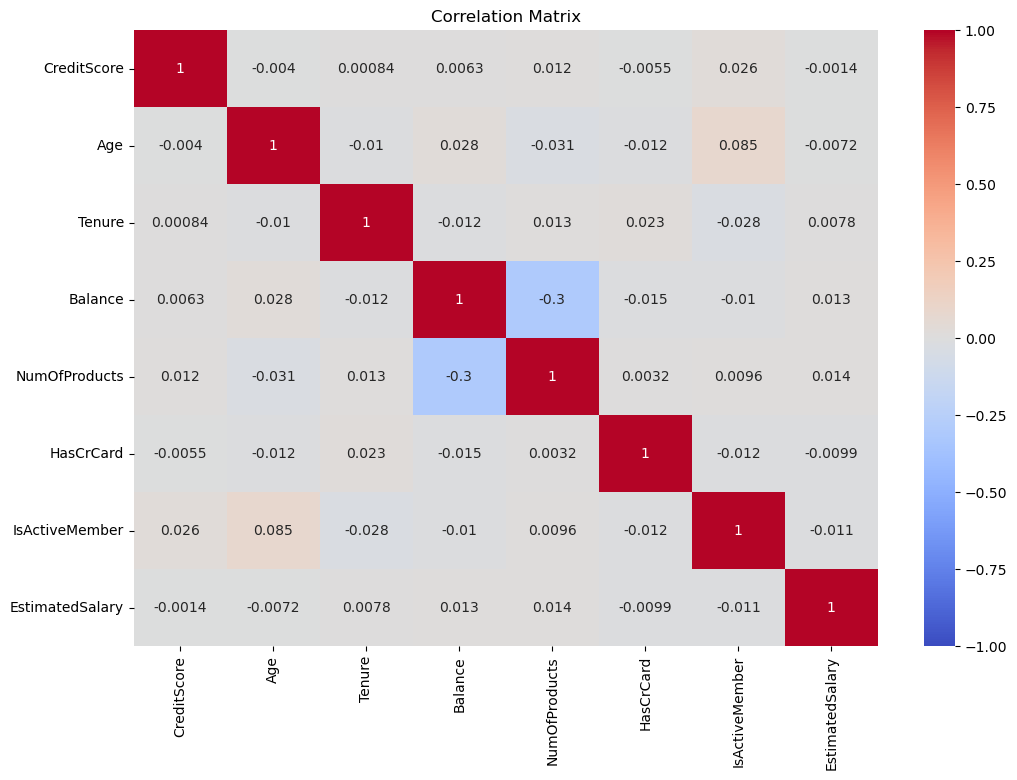

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for continuous features
correlation_matrix = data[continuous_features].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


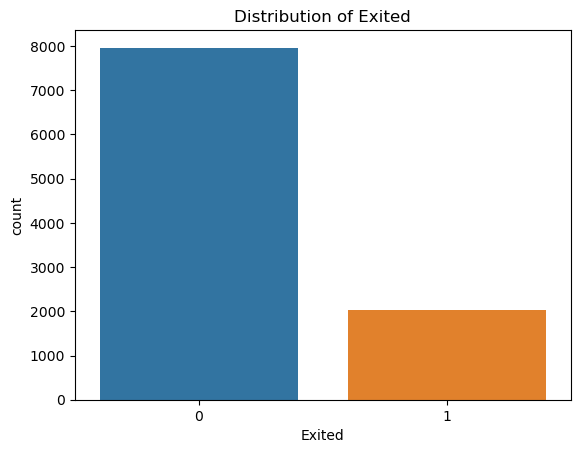

In [23]:
#Visualising the target variable

import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for the 'Exited' column
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Exited')
plt.show()

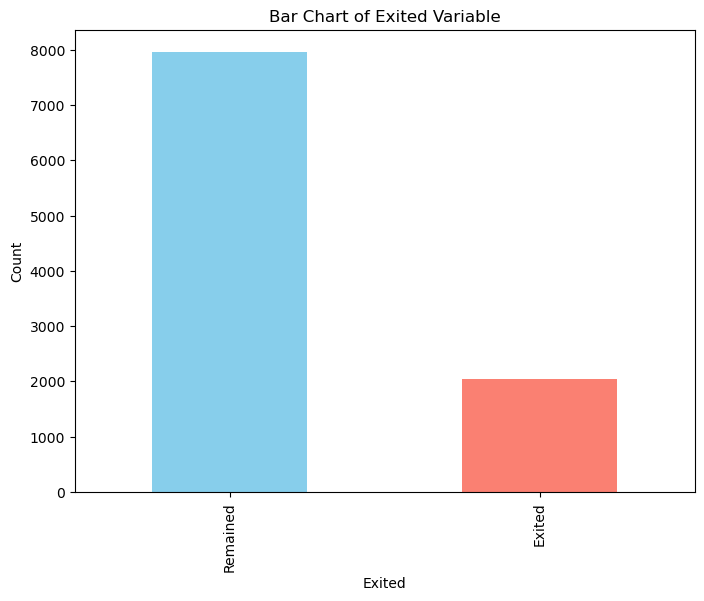

In [24]:
# Plot a bar chart for the target variable, 'Exited'
plt.figure(figsize=(8, 6))
data['Exited'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Bar Chart of Exited Variable')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Remained', 'Exited'])
plt.show()

In [25]:
! pip install -U imbalanced-learn

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from imblearn.over_sampling import RandomOverSampler
# Oversampling using RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X_train_final, y_train)

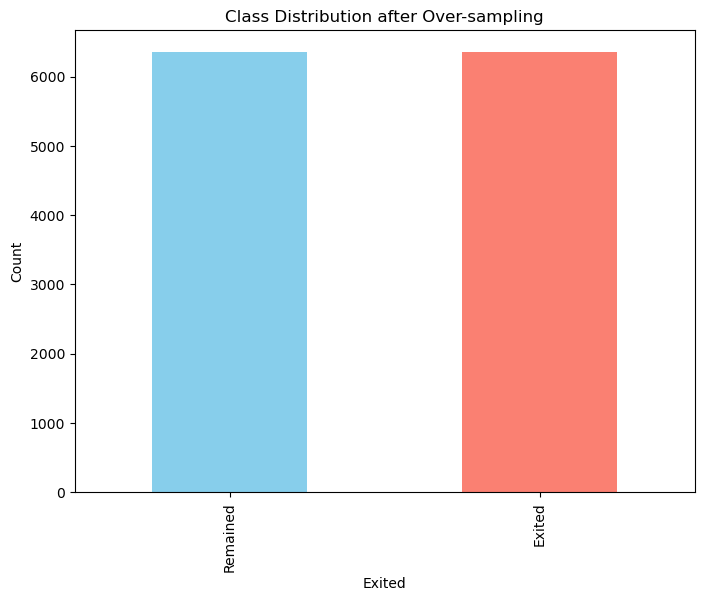

In [28]:
# Plotting the class distribution after oversampling
plt.figure(figsize=(8, 6))
y_res.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution after Over-sampling')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Remained', 'Exited'])
plt.show()

In [29]:
y_res.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

In [30]:
# Step 1: Defining the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

LOGISTIC REGRESSION

In [31]:
# Logistic Regression model
log_reg = LogisticRegression()

In [32]:
# Training the model
log_reg.fit(X_res, y_res)

LogisticRegression()

In [33]:
# Predictions on the test set
y_pred = log_reg.predict(X_test_final)

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1166  441]
 [ 112  281]]


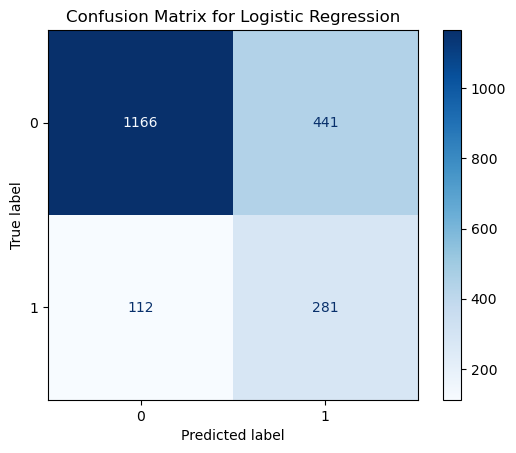

Confusion Matrix:
[[1166  441]
 [ 112  281]]
Accuracy: 0.7235
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [35]:
# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



In [36]:
# Fine-tuning the model using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_res, y_res)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [37]:
#print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

In [38]:
# Predictions with the best model
y_pred_best = best_model.predict(X_test_final)

In [39]:
# Confusion Matrix with best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Model):")
print(conf_matrix_best)

Confusion Matrix (Best Model):
[[1165  442]
 [ 112  281]]


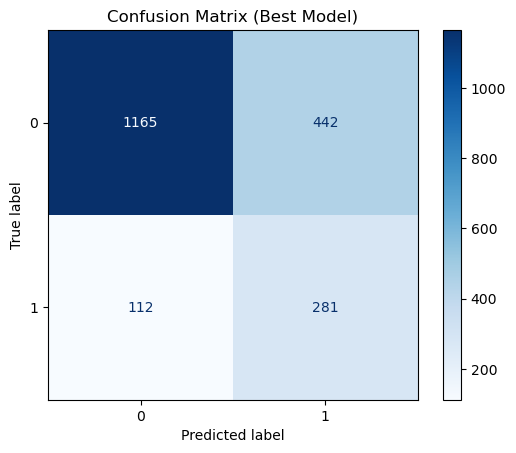

Confusion Matrix (Best Model):
[[1165  442]
 [ 112  281]]
Accuracy (Best Model): 0.7230
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.72      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [40]:
# Plotting the confusion matrix for the best model
disp_best = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best, display_labels=best_model.classes_)
disp_best.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best Model)")
plt.show()

# Confusion Matrix with best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (Best Model):")
print(conf_matrix_best)


# Accuracy Score with best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy (Best Model): {accuracy_best:.4f}")


# Classification Report with best model
class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report (Best Model):")
print(class_report_best)





DECISION TREE

In [41]:
# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)


In [42]:
# Training the model
dt.fit(X_res, y_res)


DecisionTreeClassifier(random_state=42)

In [43]:
# Predictions on the test set
y_pred_dt = dt.predict(X_test_final)


In [44]:
# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

Confusion Matrix (Decision Tree):
[[1398  209]
 [ 206  187]]


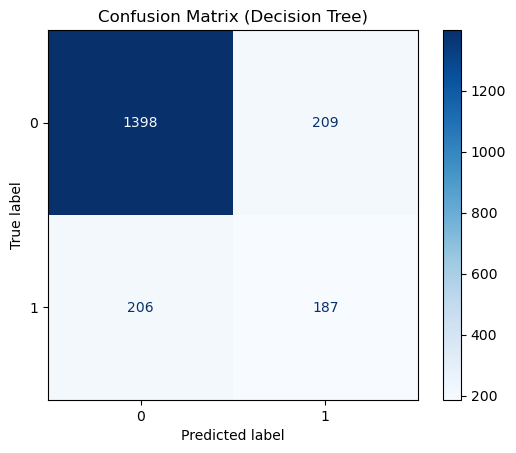

Confusion Matrix (Decision Tree):
[[1398  209]
 [ 206  187]]
Accuracy (Decision Tree): 0.7925
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.47      0.48      0.47       393

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [45]:
# Plotting the confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=dt.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

# Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (Decision Tree): {accuracy_dt:.4f}")

# Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report (Decision Tree):")
print(class_report_dt)


In [46]:
# Fine-tuning the Decision Tree model using GridSearchCV
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_res, y_res)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [47]:
#print(f"Best parameters (Decision Tree): {grid_search_dt.best_params_}")
best_model_dt = grid_search_dt.best_estimator_

In [48]:
# Predictions with the best Decision Tree model
y_pred_best_dt = best_model_dt.predict(X_test_final)

In [49]:
# Confusion Matrix with best model
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Confusion Matrix (Best Decision Tree):")
print(conf_matrix_best_dt)

Confusion Matrix (Best Decision Tree):
[[1398  209]
 [ 206  187]]


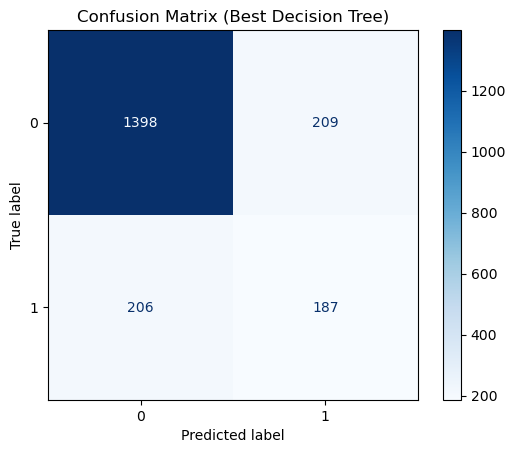

Confusion Matrix (Best Decision Tree):
[[1398  209]
 [ 206  187]]
Accuracy (Best Decision Tree): 0.7925
Classification Report (Best Decision Tree):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.47      0.48      0.47       393

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [50]:
# Plotting the confusion matrix for the best model
disp_best_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best_dt, display_labels=best_model_dt.classes_)
disp_best_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best Decision Tree)")
plt.show()

# Confusion Matrix with best model
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)
print("Confusion Matrix (Best Decision Tree):")
print(conf_matrix_best_dt)

# Accuracy Score with best model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Accuracy (Best Decision Tree): {accuracy_best_dt:.4f}")

# Classification Report with best model
class_report_best_dt = classification_report(y_test, y_pred_best_dt)
print("Classification Report (Best Decision Tree):")
print(class_report_best_dt)

SVM

In [51]:
# SVM model
svm = SVC(random_state=42)


In [52]:
# Training the model
svm.fit(X_res, y_res)

SVC(random_state=42)

In [53]:
# Predictions on the test set
y_pred_svm = svm.predict(X_test_final)

In [54]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

Confusion Matrix (SVM):
[[1288  319]
 [ 103  290]]


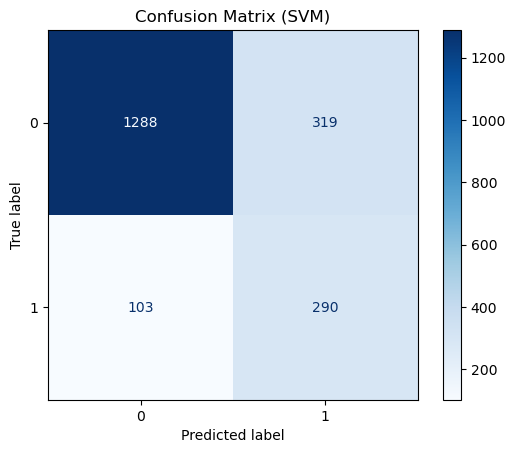

Confusion Matrix (SVM):
[[1288  319]
 [ 103  290]]
Accuracy (SVM): 0.7890
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.74      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [55]:
# Plotting the confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (SVM)")
plt.show()

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")

# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):")
print(class_report_svm)


KNN

In [56]:
# KNN model
knn = KNeighborsClassifier()

In [57]:
# Training the model
knn.fit(X_res, y_res)

KNeighborsClassifier()

In [58]:
# Predictions on the test set
y_pred_knn = knn.predict(X_test_final)

In [59]:
# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)


Confusion Matrix (KNN):
[[1192  415]
 [ 145  248]]


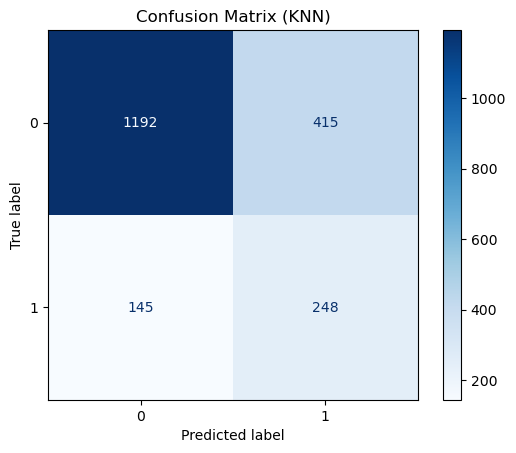

Confusion Matrix (KNN):
[[1192  415]
 [ 145  248]]
Accuracy (KNN): 0.7200
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1607
           1       0.37      0.63      0.47       393

    accuracy                           0.72      2000
   macro avg       0.63      0.69      0.64      2000
weighted avg       0.79      0.72      0.74      2000



In [60]:
# Plotting the confusion matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_knn, display_labels=knn.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (KNN)")
plt.show()

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

# Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.4f}")

# Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (KNN):")
print(class_report_knn)

In [61]:
# Fine-tuning the KNN model using GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [62]:
#print(f"Best parameters (KNN): {grid_search_knn.best_params_}")
best_model_knn = grid_search_knn.best_estimator_

In [63]:
# Predictions with the best KNN model
y_pred_best_knn = best_model_knn.predict(X_test_final)

In [64]:
# Confusion Matrix with best model
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
print("Confusion Matrix (Best KNN):")
print(conf_matrix_best_knn)

Confusion Matrix (Best KNN):
[[1291  316]
 [ 159  234]]


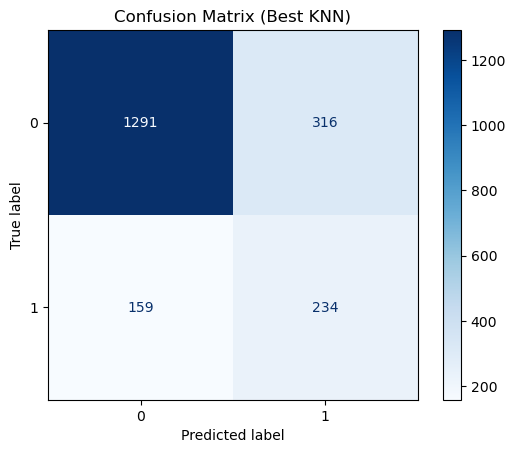

Confusion Matrix (Best KNN):
[[1291  316]
 [ 159  234]]
Accuracy (Best KNN): 0.7625
Classification Report (Best KNN):
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1607
           1       0.43      0.60      0.50       393

    accuracy                           0.76      2000
   macro avg       0.66      0.70      0.67      2000
weighted avg       0.80      0.76      0.78      2000



In [65]:
# Plotting the confusion matrix for the best model
disp_best_knn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_best_knn, display_labels=best_model_knn.classes_)
disp_best_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Best KNN)")
plt.show()

# Confusion Matrix with best model
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
print("Confusion Matrix (Best KNN):")
print(conf_matrix_best_knn)

# Accuracy Score with best model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Accuracy (Best KNN): {accuracy_best_knn:.4f}")

# Classification Report with best model
class_report_best_knn = classification_report(y_test, y_pred_best_knn)
print("Classification Report (Best KNN):")
print(class_report_best_knn)

GRADIENT BOOSTING

In [66]:
# Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

In [67]:
# Training the model
gb.fit(X_res, y_res)

GradientBoostingClassifier(random_state=42)

In [68]:
# Predictions on the test set
y_pred_gb = gb.predict(X_test_final)

In [69]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)

Confusion Matrix (Gradient Boosting):
[[1312  295]
 [  82  311]]


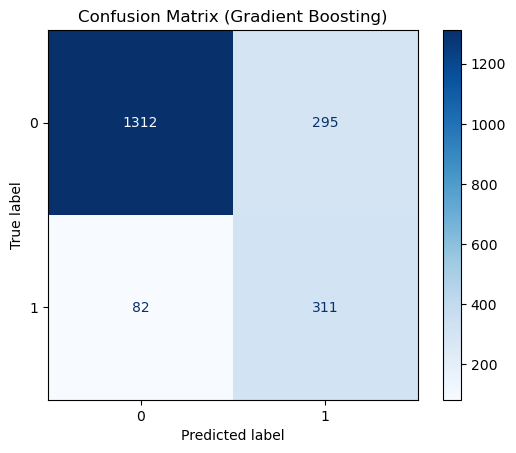

Confusion Matrix (Gradient Boosting):
[[1312  295]
 [  82  311]]
Accuracy (Gradient Boosting): 0.8115
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1607
           1       0.51      0.79      0.62       393

    accuracy                           0.81      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.86      0.81      0.82      2000



In [70]:
# Plotting the confusion matrix
disp_gb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb, display_labels=gb.classes_)
disp_gb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix (Gradient Boosting):")
print(conf_matrix_gb)

# Accuracy Score
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.4f}")

# Classification Report
class_report_gb = classification_report(y_test, y_pred_gb)
print("Classification Report (Gradient Boosting):")
print(class_report_gb)


RANDOM FOREST

In [71]:
# Random Forest model
rf = RandomForestClassifier(random_state=42)


In [72]:
# Training the model
rf.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

In [73]:
# Predictions on the test set
y_pred_rf = rf.predict(X_test_final)


In [74]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Confusion Matrix (Random Forest):
[[1501  106]
 [ 177  216]]


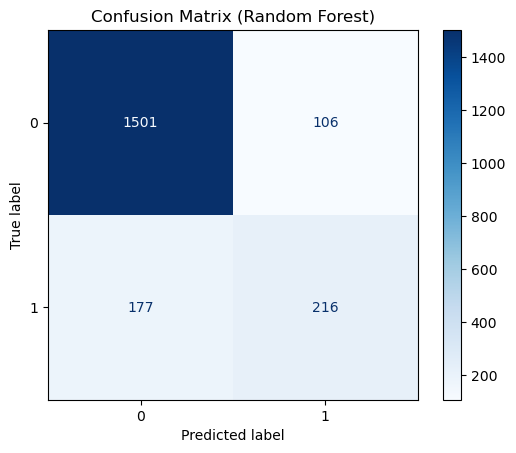

Confusion Matrix (Random Forest):
[[1501  106]
 [ 177  216]]
Accuracy (Random Forest): 0.8585
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1607
           1       0.67      0.55      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [75]:
# Plotting the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Random Forest)")
plt.show()

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(class_report_rf)


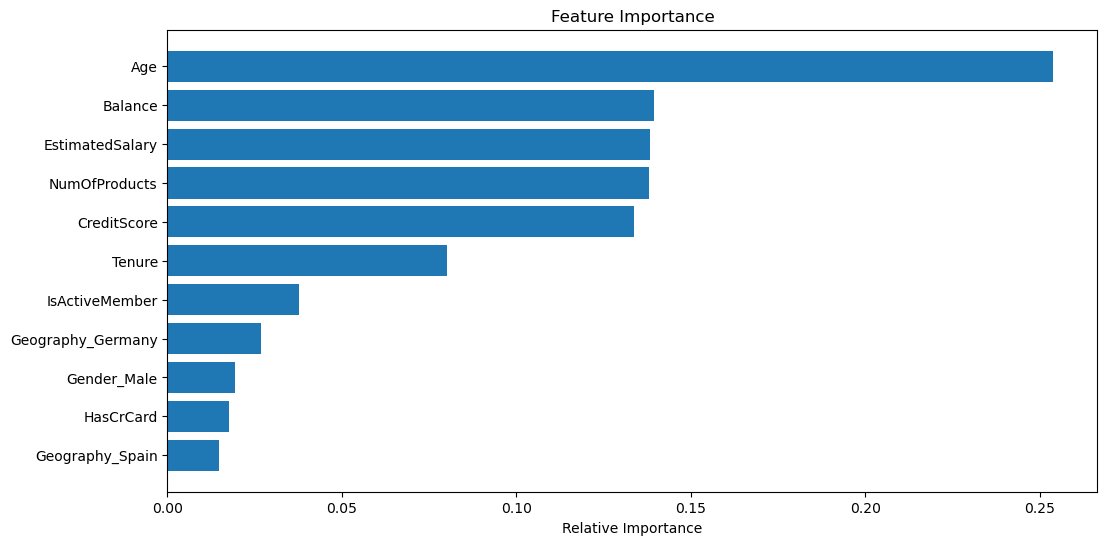

In [76]:
# Plotting feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train_final.columns[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), names)
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.show()





